# AssistMent2012 数据集分析

# 数据集简介
该数据集来自 2012-2013 学年的 ASSISTments 系统，包含了学生在完成数学问题时的交互数据。与2009数据集类似，该数据集记录了学生的答题情况、提示请求、时间信息等，并额外包含了**学生情绪状态的置信度预测**（如挫败、困惑、专注和无聊）。

> 该数据集中每个问题只与一个技能相对应，但每个技能可以与多个问题关联。

# 数据集列含义
- problem_log_id：问题日志ID
  - 学生的每一次交互都会被记录为一条日志
  - 问题日志ID是唯一的
- skill：技能名称
- problem_id：问题ID
- user_id：学生ID
- assignment_id：作业ID
- assistment_id：辅助问题ID
  - 与问题 ID 类似。这是构建器中用户将看到的问题的 ID。如果一个问题包含多个主问题和/或支架问题，则与单个问题相关的一切内容均称为一个辅助任务，并具有相同的辅助任务 ID
- start_time：问题开始时间
- end_time：问题结束时间
- problem_type：问题答案的类型
- original(0/1)：区分主问题和支撑问题
  - 1表示主问题，0代表支撑问题
- correct(0/1)：问题的回复是否正确
  - 1表示第一尝试即正确，0表示第一次尝试错误或者请求了帮助
- bottom_hint(0/1)：是否请求了最底层提示
  - 1表示请求了最底层提示，0表示没有请求
- hint_count：学生期间请求提示的次数
- actions：学生的操作序列
- attempt_count：尝试次数（学生输入答案的次数）
- ms_first_response：开始时间与学生首次操作之间的时间间隔（单位：毫秒）
- tutor_mode：导师模式或测试模式
  - 导师模式：tutor
  - 测试模式：test
- sequence_id：习题集的ID
- student_class_id：学生的班级ID
- position：问题在作业页面上的位置
- type：问题集的类型
  - LinearSection
  - MasterySection
  - RandomChildOrderSection
  - RandomIterateSection
  - PlacementsSection
  - ChooseConditionSection
  - NumericLimitSection
- base_sequence_id：用于标记习题集被复制的情况
- skill_id：技能ID（多个技能用逗号分隔）
- teacher_id：教师ID
- school_id：学校ID
- overlap_time：学生完成该问题所用的时间（单位：秒）
- template_id：ASSISTments的模板ID
- answer_id：多选题答案的ID
- answer_text：填空题的答案文本
- first_action：学生首次操作的类型
- problemlogid：与problem_log_id相同（冗余列）
- Average_confidence(FRUSTRATED)：预测的挫败情绪置信度
- Average_confidence(CONFUSED)：预测的困惑情绪置信度
- Average_confidence(CONCENTRATING)：预测的专注情绪置信度
- Average_confidence(BORED)：预测的无聊情绪置信度

# 补充说明

## 主问题和支撑式问题
当学生在解决一个**主问题**时回答错误或者主动要求将问题分解成小步骤时，ASSISTment系统会提供**一个或多个支撑式问题**。
- 支撑式问题在数据集中使用*original*字段进行标记
- 学生通常不能在回答支撑式问题时获取提示

## 导师模式
在数据集中*tutor_mode*列用于区分学生做题时系统处于导师(tutor)还是测试(test)模式。
在导师模式中，学生做题时可以获得即时反馈、提示或逐步辅导；在测试模式中，学生做题时系统不会给出任何反馈和指导信息。

## 情绪状态预测
该数据集包含了四种情绪状态的置信度预测：挫败(FRUSTRATED)、困惑(CONFUSED)、专注(CONCENTRATING)和无聊(BORED)。这些预测值是由机器学习模型根据学生的交互行为生成的。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ASSISTments 2012 dataset
data = pd.read_csv(
    "data/assistment12/2012-2013-data-with-predictions-4-final.csv",
    low_memory=False,
    encoding="latin1",
    )

In [32]:
print(data["type"].unique())

['LinearSection' 'MasterySection' 'RandomChildOrderSection'
 'RandomIterateSection' 'PlacementsSection' 'ChooseConditionSection'
 'NumericLimitSection']


In [2]:
# 显示数据集的前十行
data.head(10)

problem_log_id                                 skill  problem_id  user_id  \
0       137792159                                   NaN      557460    61394   
1       138083797                              Rounding      365981    61394   
2       142332619  Multiplication and Division Integers      426415    61394   
3       145939397                            Proportion       86686    61394   
4       137111284                                   NaN      399669    76592   
5       140218191                             Exponents      401234    76592   
6       144931507                                   NaN      403690    77966   
7       138367797   Equation Solving Two or Fewer Steps       87699    78401   
8       138657569   Equation Solving Two or Fewer Steps       88297    78409   
9       140668758                                   NaN       41071    78409   

   assignment_id  assistment_id           start_time                 end_time  \
0         565736         341511  2012-09-28 15:11:27  2012-09-28 15:11:36.856   
1         573819         204043  2012-10-09 11:01:52  2012-10-09 11:02:13.182   
2         734130         247525  2013-03-07 10:53:20  2013-03-07 10:53:28.661   
3         821352          48081  2013-08-20 19:54:56  2013-08-20 19:55:21.753   
4         557216         227869  2012-09-10 17:20:10  2012-09-10 17:24:56.579   
5         639711         228996  2012-12-12 21:00:55  2012-12-12 21:01:07.536   
6         802691         231052  2013-05-17 07:31:51  2013-05-17 07:32:08.175   
7         581453          49019  2012-10-16 10:30:54  2012-10-16 10:31:55.445   
8         588928          49605  2012-10-23 12:54:46  2012-10-23 12:55:13.919   
9         639334          29216  2013-01-07 13:39:57  2013-01-07 13:42:01.167   

  problem_type  original  ...  overlap_time  template_id  answer_id  \
0     choose_1         1  ...          9852       341511        NaN   
1      algebra         1  ...         21175       204043        NaN   
2      algebra         1  ...          8645       247525        NaN   
3      algebra         1  ...         25728        46362        NaN   
4     choose_1         1  ...        286578       227869        NaN   
5      algebra         1  ...         12522       129499        NaN   
6      algebra         1  ...         17160       107869        NaN   
7      algebra         1  ...         61439        46279        NaN   
8      algebra         1  ...         27913        30833        NaN   
9      algebra         1  ...        124162        29216        NaN   

          answer_text  first_action  problemlogid  \
0                 she             0     137792159   
1               74.29             0     138083797   
2                  00             0     142332619   
3                 3.8             0     145939397   
4  C (wr - 1)(wr + 1)             0     137111284   
5                1024             0     140218191   
6                  21             0     144931507   
7                  -4             0     138367797   
8                   1             0     138657569   
9                  38             0     140668758   

  Average_confidence(FRUSTRATED)  Average_confidence(CONFUSED)  \
0                       0.361323                           0.0   
1                       0.361323                           0.0   
2                       0.361323                           0.0   
3                       0.775000                           0.0   
4                       0.361323                           0.0   
5                       0.361323                           0.0   
6                       0.361323                           0.0   
7                       0.361323                           0.0   
8                       0.361323                           0.0   
9                       0.361323                           0.0   

   Average_confidence(CONCENTRATING)  Average_confidence(BORED)  
0                           0.336529                   0.000000  
1    

In [3]:
# 显示数据集的基本统计信息
data.describe()

problem_log_id    problem_id       user_id  assignment_id  \
count    6.123270e+06  6.123270e+06  6.123270e+06   6.123270e+06   
mean     1.414932e+08  3.685675e+05  1.770492e+05   6.773074e+05   
std      2.693733e+06  2.195421e+05  3.172431e+04   9.425983e+04   
min      1.368431e+08  1.000000e+00  2.142100e+04   1.814560e+05   
25%      1.391705e+08  1.284030e+05  1.719780e+05   5.863570e+05   
50%      1.414916e+08  4.168130e+05  1.791670e+05   6.785645e+05   
75%      1.438272e+08  5.644030e+05  1.972510e+05   7.672320e+05   
max      1.462357e+08  7.671430e+05  2.282130e+05   8.330540e+05   

       assistment_id      original       correct   bottom_hint    hint_count  \
count   6.123270e+06  6.123270e+06  6.123270e+06  6.062922e+06  6.123270e+06   
mean    2.202825e+05  9.504296e-01  6.768206e-01  1.200497e-01  3.373479e-01   
std     1.393519e+05  2.170557e-01  4.674909e-01  3.250197e-01  9.851956e-01   
min     5.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     6.883725e+04  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%     2.399180e+05  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
75%     3.466830e+05  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
max     4.925890e+05  1.000000e+00  1.000000e+00  1.000000e+00  1.400000e+01   

       attempt_count  ...     school_id  overlap_time   template_id  \
count   6.123270e+06  ...  6.123113e+06  6.123270e+06  6.123270e+06   
mean    1.339212e+00  ...  6.925225e+03  4.907237e+04  2.088952e+05   
std     1.056276e+00  ...  3.314489e+03  2.884992e+05  1.458227e+05   
min     0.000000e+00  ...  1.000000e+00 -6.767000e+03  5.000000e+00   
25%     1.000000e+00  ...  5.260000e+03  9.468000e+03  5.259000e+04   
50%     1.000000e+00  ...  5.978000e+03  2.241500e+04  2.395460e+05   
75%     1.000000e+00  ...  9.394000e+03  5.505400e+04  3.434800e+05   
max     2.900000e+01  ...  1.242800e+04  3.452775e+08  4.925890e+05   

          answer_id  first_action  problemlogid  \
count  8.275000e+03  6.123270e+06  6.123270e+06   
mean   4.324879e+05  6.151860e-02  1.414932e+08   
std    3.534885e+05  2.635170e-01  2.693733e+06   
min    1.000000e+00  0.000000e+00  1.368431e+08   
25%    1.060495e+05  0.000000e+00  1.391705e+08   
50%    3.442820e+05  0.000000e+00  1.414916e+08   
75%    7.385615e+05  0.000000e+00  1.438272e+08   
max    1.184706e+06  2.000000e+00  1.462357e+08   

       Average_confidence(FRUSTRATED)  Average_confidence(CONFUSED)  \
count                    6.123270e+06                  6.123270e+06   
mean                     3.894586e-01                  4.479487e-02   
std                      1.027662e-01                  1.924793e-01   
min                      3.613230e-01                  0.000000e+00   
25%                      3.613230e-01                  0.000000e+00   
50%                      3.613230e-01                  0.000000e+00   
75%                      3.613230e-01                  0.000000e+00   
max                      8.671330e-01                  1.000000e+00   

       Average_confidence(CONCENTRATING)  Average_confidence(BORED)  
count                       6.123270e+06               6.123270e+06  
mean                        6.823843e-01               2.567723e-01  
std                         1.713734e-01               2.862460e-01  
min                         1.707320e-01               0.000000e+00  
25%                         7.669250e-01               0.000000e+00  
50%                         7.669250e-01               2.214840e-01  
75%                         7.669250e-01               4.429680e-01  
max                         7.669250e-01               1.000000e+00  

[8 rows x 27 columns]

# 数据集中关键列的统计信息

## 数据缺失情况
下面统计原始数据中存在缺失值的列及其缺失数量。

In [8]:
# 统计原始数据中所有存在缺失值的列
missing_values = data.isna().sum()
print(missing_values[missing_values > 0])

skill          3493190
bottom_hint      60348
skill_id       3411457
school_id          157
answer_id      6114995
answer_text     346500
dtype: int64


## 数据集原始数据量
以下数据描述了原始数据集中包含的数据数量，排除所有不具有技能ID的问题。

In [9]:
# 排除不具有技能ID的问题
data = data[data["skill_id"].notna()]

In [10]:
# 统计学生数量
num_students = data["user_id"].nunique()
print(f"Number of students: {num_students}")

# 统计问题数量
num_questions = data["problem_id"].nunique()
print(f"Number of questions: {num_questions}")

# 统计技能数量
num_skills = data["skill_id"].dropna().nunique()
print(f"Number of skills: {num_skills}")

# 主问题数量
num_main_questions = data[data["original"] == 1]["problem_id"].nunique()
print(f"Number of main questions: {num_main_questions}")

# 支撑问题数量
num_scaffolding_questions = data[data["original"] == 0]["problem_id"].nunique()
print(f"Number of scaffolding questions: {num_scaffolding_questions}")

# 总答题记录数
total_records = len(data)
print(f"Total answer records: {total_records}")

Number of students: 29018
Number of questions: 53091
Number of skills: 265
Number of main questions: 47124
Number of scaffolding questions: 5967
Total answer records: 2711813


# 统计数据量
以下数据通过一些统计量来描述数据集的结构。

In [17]:
# 平均每个学生的答题次数
avg_attempts_per_student = data.groupby("user_id")["problem_id"].count().mean()
print(f"Average attempts per student: {avg_attempts_per_student:.2f}")

# 每个技能平均与多少个问题相关
skill_question_counts = data.groupby("skill_id")["problem_id"].nunique().mean()
print(f"Average number of questions per skill: {skill_question_counts:.2f}")

Average attempts per student: 93.45
Average number of questions per skill: 200.34


# 其他列的分析

- 技能信息
- 主问题和支撑问题
- 首次操作类型
- 题目的答案类型
- 导师模式分布
- 情绪状态预测

### 技能 (skill_id, skill)
与2009数据集不同，2012数据集中的技能信息可能包含多个技能（用逗号分隔）。

In [18]:
# 技能的数量
all_skills = set()
for skill_ids in data["skill_id"].dropna():
    if isinstance(skill_ids, str):
        skills = skill_ids.split(',')
        all_skills.update(skills)
print(f"Total unique skills: {len(all_skills)}")

# 筛选出没有关联技能的问题
questions_without_skills = data[data["skill_id"].isnull()]["problem_id"].unique()
print(f"Number of questions without associated skills: {len(questions_without_skills)}")

# 答题记录没有技能的数量
records_without_skills = data[data["skill_id"].isnull()].shape[0]
print(f"Number of answer records without skills: {records_without_skills}")
print(f"Percentage: {records_without_skills / len(data) * 100:.2f}%")

Total unique skills: 0
Number of questions without associated skills: 0
Number of answer records without skills: 0
Percentage: 0.00%


### 主问题和支撑问题 (original)
- 主问题：1
- 支撑问题：0

In [19]:
# 选择所有的主问题
main_questions = data[data["original"] == 1]["problem_id"].unique()
print(f"Total main questions: {len(main_questions)}")
main_records = data[data["original"] == 1].shape[0]
print(f"Total main question records: {main_records}")

# 选择所有的支撑问题
scaffolding_questions = data[data["original"] == 0]["problem_id"].unique()
print(f"Total scaffolding questions: {len(scaffolding_questions)}")
scaffolding_records = data[data["original"] == 0].shape[0]
print(f"Total scaffolding question records: {scaffolding_records}")

Total main questions: 47124
Total main question records: 2623624
Total scaffolding questions: 5967
Total scaffolding question records: 88189


### 首次操作的类型 (first_action)
统计学生首次操作的类型分布。

In [20]:
# 首次操作的类型
first_action_types = data["first_action"].dropna().unique()
print("First action types in the dataset:", first_action_types)

# 首次操作类型的分布
first_action_counts = data["first_action"].value_counts()
print("\nFirst action distribution:")
print(first_action_counts)

First action types in the dataset: [0 2 1]

First action distribution:
first_action
0    2586157
1     110829
2      14827
Name: count, dtype: int64


### 题目的答案类型 (problem_type)
统计不同答案类型的题目数量。

In [21]:
# 题目的答案类型
answer_type = data["problem_type"].dropna().unique()
print("Answer types in the dataset:", answer_type)

# 每个类型的题目数量分布
answer_type_counts = {}
for atype in answer_type:
    count = data[data["problem_type"] == atype]["problem_id"].nunique()
    answer_type_counts[atype] = count
    print(f"{atype} questions: {count}")

Answer types in the dataset: ['algebra' 'fill_in_1' 'choose_1' 'choose_n' 'rank' 'open_response']
algebra questions: 31379
fill_in_1 questions: 10828
choose_1 questions: 10616
choose_n questions: 181
rank questions: 44
open_response questions: 43


### 导师模式 (tutor_mode)
统计导师模式的分布情况。

In [22]:
# 导师模式的分布
tutor_mode_counts = data["tutor_mode"].value_counts()
print("Tutor mode distribution:")
print(tutor_mode_counts)
print(f"\nPercentage of tutor mode:")
print(tutor_mode_counts / len(data) * 100)

Tutor mode distribution:
tutor_mode
tutor    2711097
test         716
Name: count, dtype: int64

Percentage of tutor mode:
tutor_mode
tutor    99.973597
test      0.026403
Name: count, dtype: float64


### 情绪状态预测
2012数据集包含了四种情绪状态的置信度预测：挫败、困惑、专注和无聊。

In [12]:
# 情绪状态预测的统计信息
emotion_columns = ['Average_confidence(FRUSTRATED)', 'Average_confidence(CONFUSED)', 
                   'Average_confidence(CONCENTRATING)', 'Average_confidence(BORED)']

print("Emotion prediction statistics:")
for col in emotion_columns:
    if col in data.columns:
        print(f"\n{col}:")
        print(f"  Mean: {data[col].mean():.4f}")
        print(f"  Std: {data[col].std():.4f}")
        print(f"  Min: {data[col].min():.4f}")
        print(f"  Max: {data[col].max():.4f}")
        print(f"  Missing: {data[col].isnull().sum()}")

Emotion prediction statistics:

Average_confidence(FRUSTRATED):
  Mean: 0.3895
  Std: 0.1028
  Min: 0.3613
  Max: 0.8671
  Missing: 0

Average_confidence(CONFUSED):
  Mean: 0.0448
  Std: 0.1925
  Min: 0.0000
  Max: 1.0000
  Missing: 0

Average_confidence(CONCENTRATING):
  Mean: 0.6824
  Std: 0.1714
  Min: 0.1707
  Max: 0.7669
  Missing: 0

Average_confidence(BORED):
  Mean: 0.2568
  Std: 0.2862
  Min: 0.0000
  Max: 1.0000
  Missing: 0


### 复制的习题集数量

In [13]:
# 复制的习题集
different_sequence = data[data["sequence_id"] != data["base_sequence_id"]]
print(f"Number of copy sequences: {different_sequence['sequence_id'].nunique()}")
print(f"Total records from copied sequences: {len(different_sequence)}")

Number of copy sequences: 2291
Total records from copied sequences: 1116621


# 数据结构可视化
这一板块中包含了对数据集中重要数据的可视化代码和结果。

- 每个技能关联的问题数量
- 学生的答题次数分布图
- 问题类型分布图
- 整体答题正确率分布图
- 情绪状态分布图
- 导师模式分布图

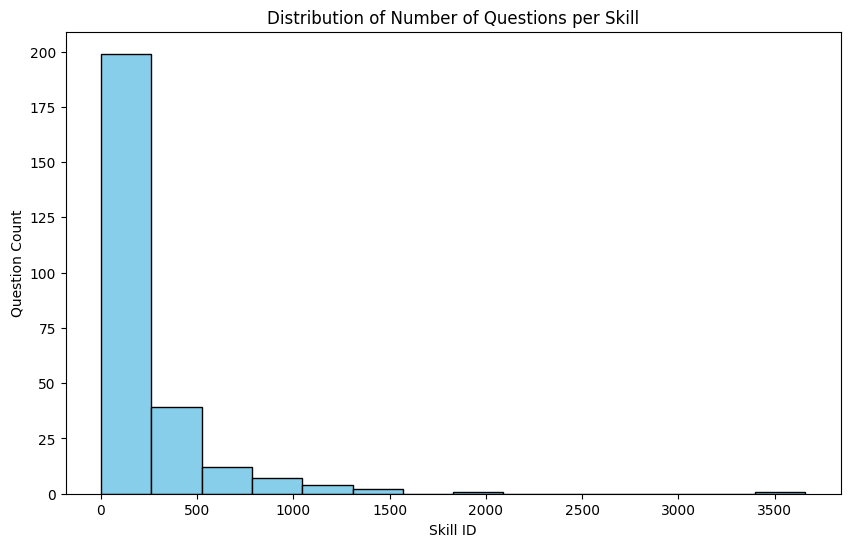

In [31]:
# 每个技能关联的问题数量
skill_question_counts = data.groupby("skill_id")["problem_id"].nunique()
plt.figure(figsize=(10, 6))
plt.hist(skill_question_counts, bins="doane", color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Questions per Skill")
plt.xlabel("Skill ID")
plt.ylabel("Question Count")
plt.show()

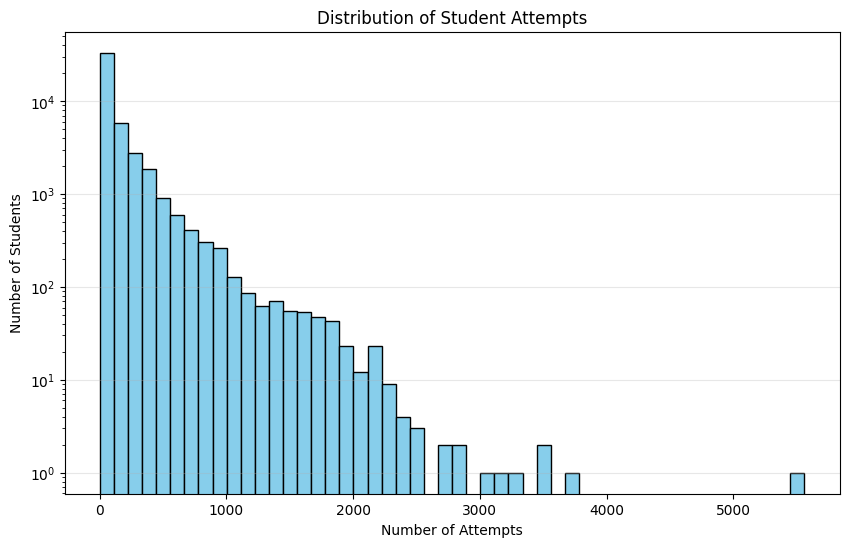

In [14]:
# 每个学生的答题次数
student_attempts = data.groupby("user_id")["problem_id"].count()

# 绘制学生答题次数的分布图
plt.figure(figsize=(10, 6))
plt.hist(student_attempts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Student Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Students')
plt.yscale('log')
plt.grid(axis='y', alpha=0.3)
plt.show()

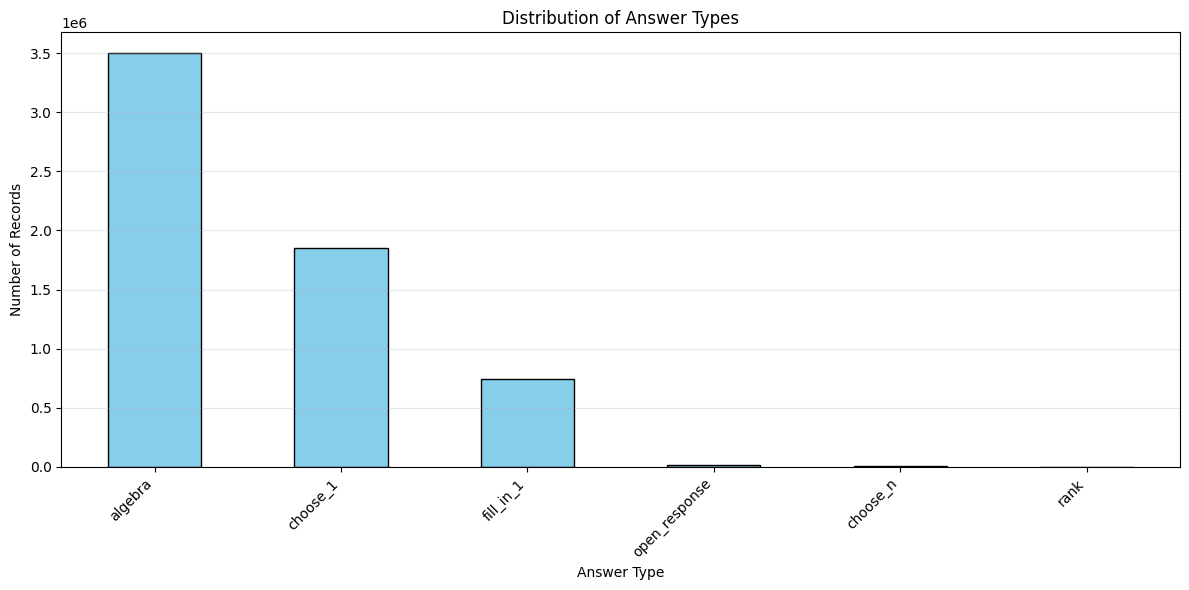

In [15]:
# 每个类型的问题数量分布
answer_type_counts = data["problem_type"].value_counts()

# 绘制问题类型数量的分布图
plt.figure(figsize=(12, 6))
answer_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Answer Types')
plt.xlabel('Answer Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Unique values in 'correct' column:
correct
0.000    1976383
0.250       1211
0.375          1
0.500       2395
0.600         24
0.625          4
0.650         10
0.750       1629
0.850         10
0.875          6
0.950          9
0.975         24
1.000    4141564
Name: count, dtype: int64


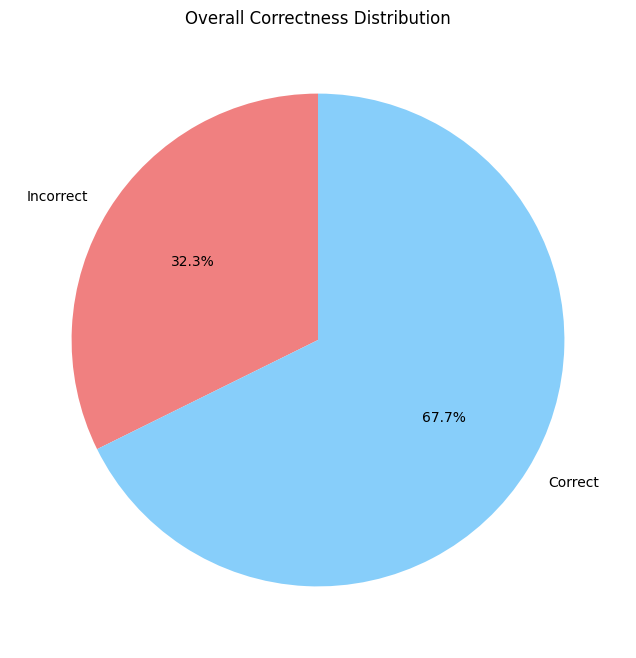

In [ ]:
# correct 列的唯一值
print("Unique values in 'correct' column:")
print(data["correct"].value_counts().sort_index())

# 答题正确率（只统计0和1）
correct_data = data[data["correct"].isin([0, 1])].groupby("correct")["problem_id"].count()

# 绘制答题正确率的饼图
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightskyblue']
labels = ['Incorrect', 'Correct']
plt.pie(correct_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Overall Correctness Distribution')
plt.show()

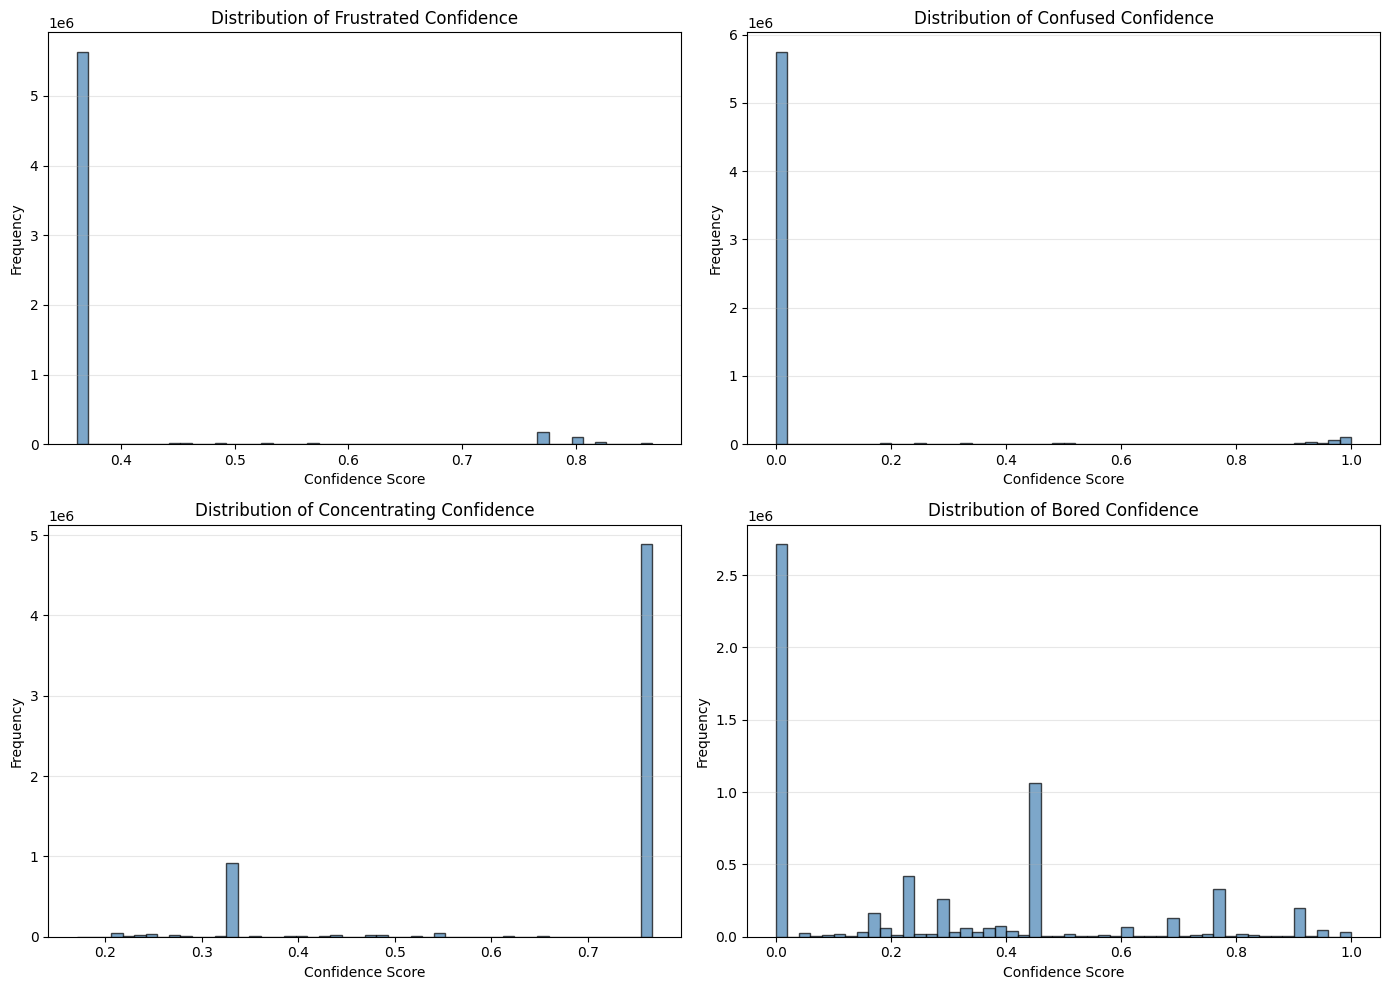

In [18]:
# 情绪状态分布图
emotion_columns = ['Average_confidence(FRUSTRATED)', 'Average_confidence(CONFUSED)', 
                   'Average_confidence(CONCENTRATING)', 'Average_confidence(BORED)']
emotion_labels = ['Frustrated', 'Confused', 'Concentrating', 'Bored']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, (col, label) in enumerate(zip(emotion_columns, emotion_labels)):
    if col in data.columns:
        axes[i].hist(data[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {label} Confidence')
        axes[i].set_xlabel('Confidence Score')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

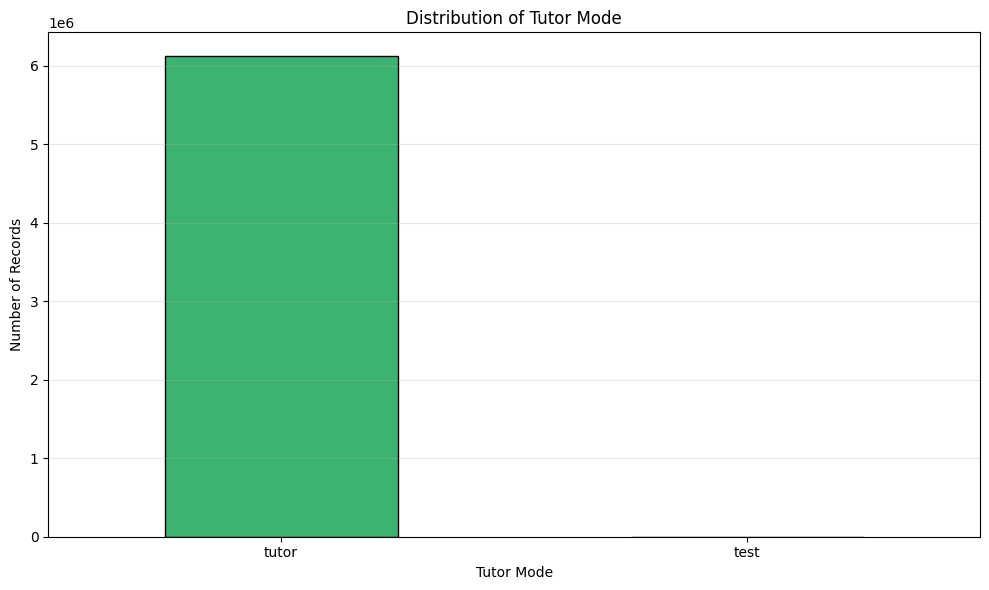

In [19]:
# 导师模式分布图
tutor_mode_counts = data["tutor_mode"].value_counts()

plt.figure(figsize=(10, 6))
tutor_mode_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Tutor Mode')
plt.xlabel('Tutor Mode')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()